## Machine Learning

### Regressão Simples

Machine Learning (ML)
Regressão é uma técnica de aprendizado supervisionado usada para prever um valor numérico contínuo (como preço, temperatura, demanda) com base em dados históricos e variáveis de entrada, encontrando a relação matemática (uma função) entre as características (variáveis independentes) e o resultado (variável dependente) para fazer previsões futuras

In [4]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"  
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
983,3.5,6,11.2,258
333,1.4,4,7.8,179
811,1.6,4,8.0,184
709,2.0,4,7.2,166
773,1.8,4,8.9,205
212,5.3,8,20.9,334
334,1.4,4,7.9,182
1056,2.5,5,9.7,223
57,3.0,6,11.4,262


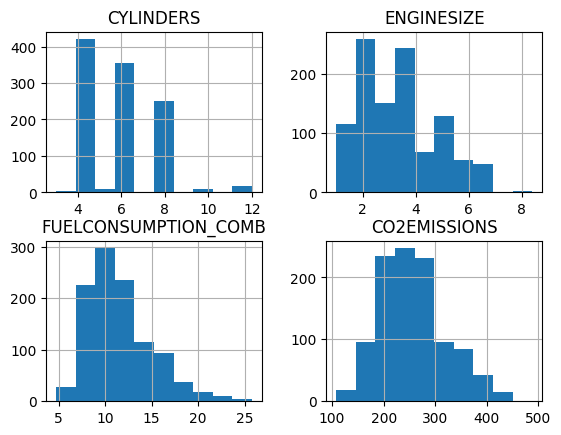

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

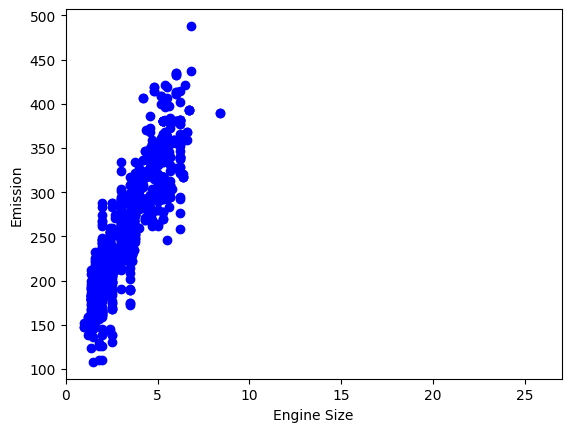

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.xlim(0, 27)
plt.show()

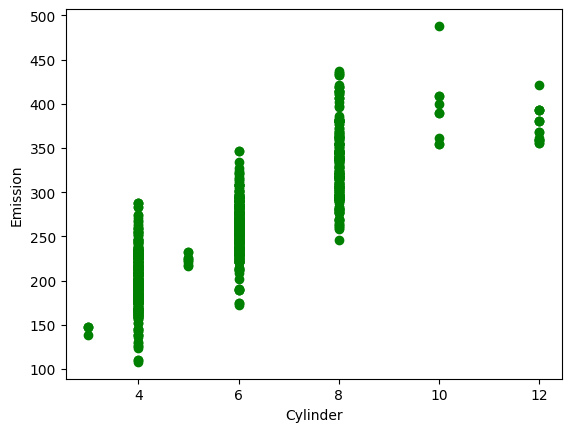

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [12]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

#### Criando um modelo de Regressão Simples

In [13]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train) #para treinar o modelo, precisamos reshape X_train para que ele deixe de ser um array 1D para um array 2D

print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


 "compatible shape" = garantir que os arrays tenham dimensões compatíveis para trabalhar juntos; 
 "reshape" = reorganizar as dimensões do array para o formato esperado pela função.



Text(0, 0.5, 'Emission')

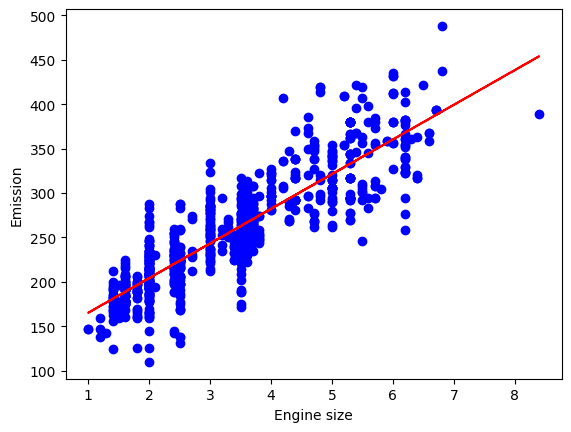

In [14]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Avaliando o modelo:

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test.reshape(-1, 1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Exercícios de Fixação:

1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.
2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.
3. Train a linear regression model using the training data you created.
4. Use the model to make test predictions on the fuel consumption testing data.
5. Calculate and print the Mean Squared Error of the test predictions.

Text(0, 0.5, 'Emission')

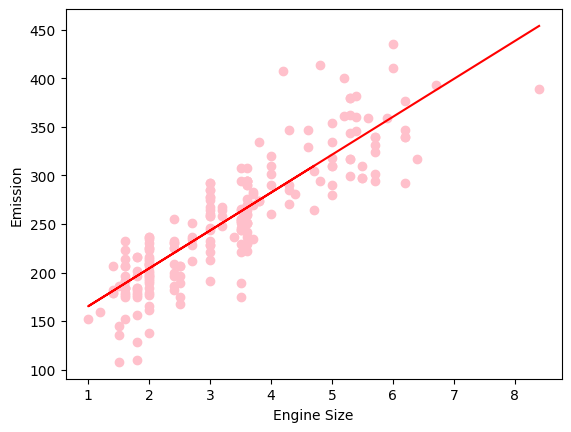

In [16]:
plt.scatter(X_test, y_test, color = 'pink')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')


In [17]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train) #para treinar o modelo, precisamos reshape X_train para que ele deixe de ser um array 1D para um array 2D

print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  16.180900781199195
Intercept:  69.10302617988444


In [19]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

In [20]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 797.43


#### Regressão Linear Múltipla (Funções de Múltiplas Variáveis)

In [21]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Usamos o .corr() para analisarmos a correlação entre diferentes variáveis para escolhermos as ideias para nosso modelo de regressão múltipla.

In [22]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [23]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [24]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


Criamos um gráfico para visualizar a relação entre diferentes variáveis:

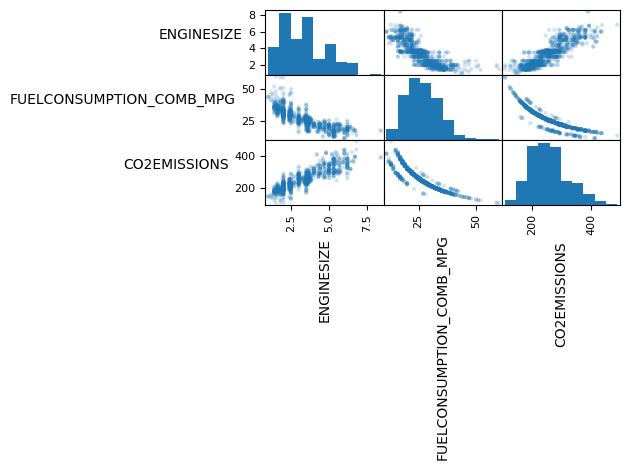

In [25]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [26]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

print(X)
print(y)

[[ 2.  33. ]
 [ 2.4 29. ]
 [ 1.5 48. ]
 ...
 [ 3.  24. ]
 [ 3.2 25. ]
 [ 3.2 22. ]]
[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


You should standardize your input features so the model doesn't inadvertently favor any feature due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation. Scikit-learn can do this for you. Uma variável standard possui média = 0 e desvio padrão = 1

In [27]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

Treinamos o modelo:

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

Criamos o modelo:

In [31]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


The Coefficients and Intercept parameters define the best-fit hyperplane to the data. Since there are only two variables, hence two parameters, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space. 

Criando um modelo de visualização 3d:

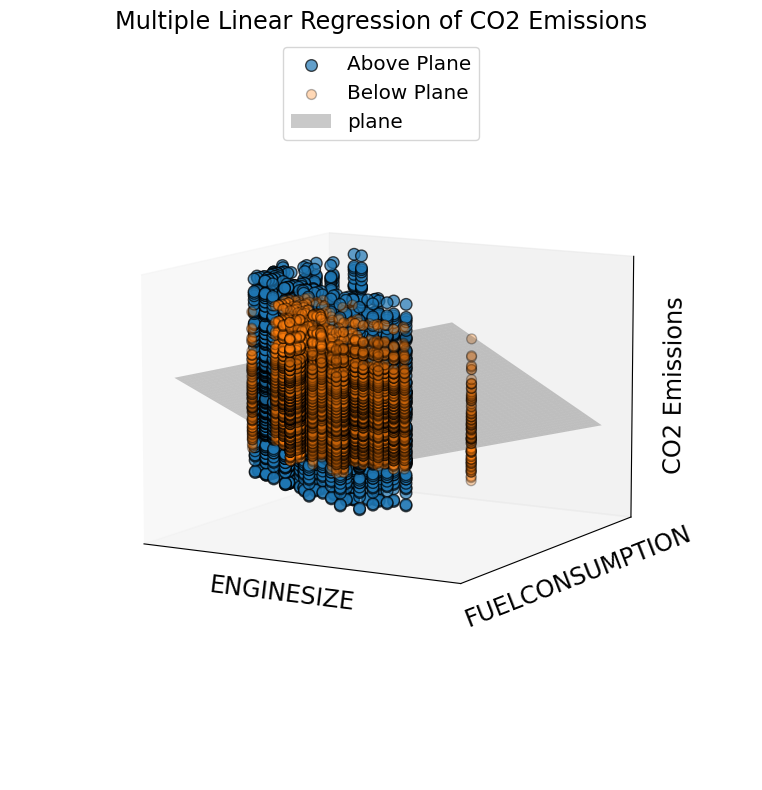

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

Exercícios Propostos: 

1. Determine and print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.
2. Produce a scatterplot of CO2 emission against ENGINESIZE and include the best-fit regression line to the training data. 
3. Generate the same scatterplot and best-fit regression line, but now base the result on the test data set. Consider how the test result compares to the training result.
4. Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead. Display the model coefficients including the intercept.
5. Generate a scatter plot showing the results as before on the test data. Consider well the model fits, and what you might be able to do to improve it. We'll revisit this later in the course.

In [52]:
X_train_1 = X_train[:, 0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)  # Corrigir aqui
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ', coef_1)
print ('Intercept: ', intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


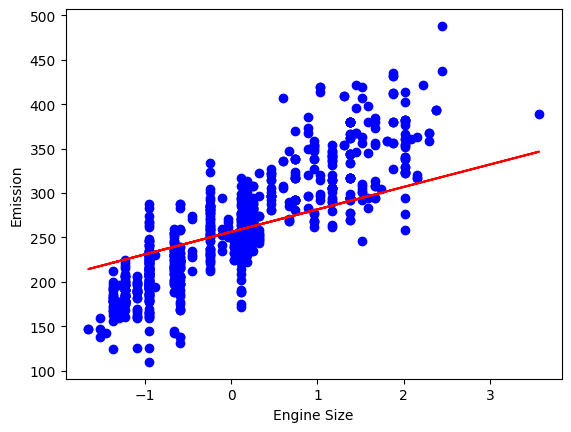

In [53]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

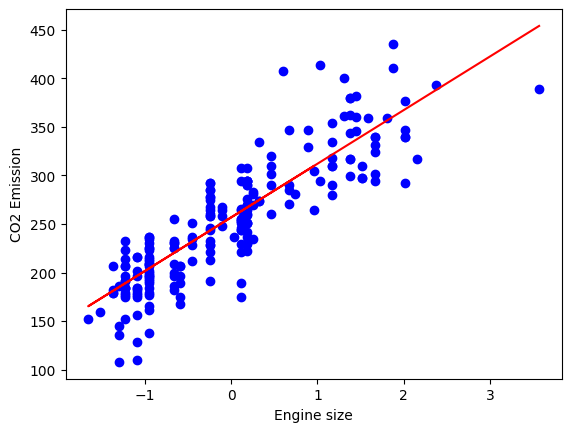

In [54]:

X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

In [56]:
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
coef_2 =  regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


Text(0, 0.5, 'CO2 Emission')

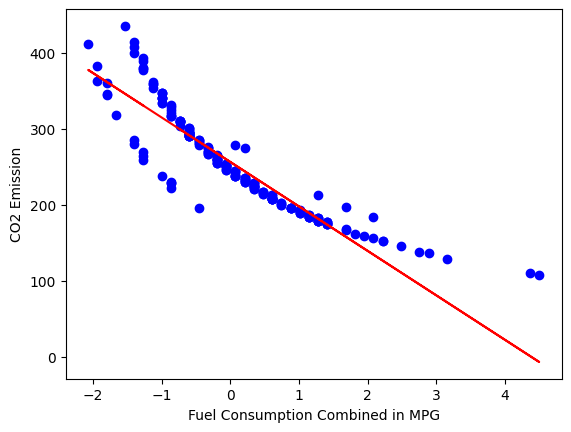

In [59]:
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0]*X_test_2 + intercept_2, '-r')
plt.xlabel("Fuel Consumption Combined in MPG")
plt.ylabel("CO2 Emission")